# Exercice 3 – Perceptron Multicouche avec Keras

### Preprocessing to be at exercice 2 step

In [1]:
import pandas as pd 
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the datasets 
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# to categorical
Y = tf.keras.utils.to_categorical(Y, num_classes = 3)

# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1234)

# shapes
print("X_train shape", X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_test shape", Y_test.shape)

X_train shape (112, 4)
X_test shape (38, 4)
y_train shape (112, 3)
y_test shape (38, 3)


1) À l'aide de Keras, créez un perceptron construit comme suit : </br>
a. Une couche dense de 16 neurones connectée à une couche d'entrée de 4
neurones. La fonction d'activation de cette couche doit être une sigmoïde. </br>
b. Une couche de sortie de 3 neurones avec une fonction d'activation softmax

In [2]:
# we fix the random state
tf.random.set_seed(1234)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]), # 4 features
    tf.keras.layers.Dense(16, activation="sigmoid"), # 16 neurons
    tf.keras.layers.Dense(3, activation="softmax"), # 3 neurons
])

2) Utiliser la fonction de perte categorical_crossentropy (perte
logarithmique), l'optimiseur Adam et activer le précalcul de la métrique de précision

In [3]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimiser, metrics=["accuracy"])


Regardons le schéma du modèle. 131 poids sont a entraîner. 

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


3) Entraîner le réseau pendant 100 epochs.

Nous l'avons d'abord entraîner avec 100 epochs. Les résultats ci-dessous sont le résultats d'un entraînement de 300 epochs. Les 200 epochs supplémentaires ont permis d'augmenter l'accuracy de 3 % (*cf. la fin du td*)

In [5]:
history = model.fit(X_train, Y_train,validation_split=0.1, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 131ms/step - loss: 1.4949 - accuracy: 0.3100 - val_loss: 1.0584 - val_accuracy: 0.4167
Epoch 2/300
4/4 [==============================] - 0s 12ms/step - loss: 1.4623 - accuracy: 0.2800 - val_loss: 1.0534 - val_accuracy: 0.4167
Epoch 3/300
4/4 [==============================] - 0s 12ms/step - loss: 1.4356 - accuracy: 0.2700 - val_loss: 1.0492 - val_accuracy: 0.4167
Epoch 4/300
4/4 [==============================] - 0s 13ms/step - loss: 1.4072 - accuracy: 0.2500 - val_loss: 1.0457 - val_accuracy: 0.3333
Epoch 5/300
4/4 [==============================] - 0s 11ms/step - loss: 1.3818 - accuracy: 0.2400 - val_loss: 1.0432 - val_accuracy: 0.1667
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 1.3550 - accuracy: 0.2400 - val_loss: 1.0413 - val_accuracy: 0.1667
Epoch 7/300
4/4 [==============================] - 0s 9ms/step - loss: 1.3300 - accuracy: 0.2400 - val_loss: 1.0413 - val_accuracy: 0.1667
Epoch 8/300
4/4 [===

Regardons les pertes du jeu de données d'entrainement en fonction des epochs. 

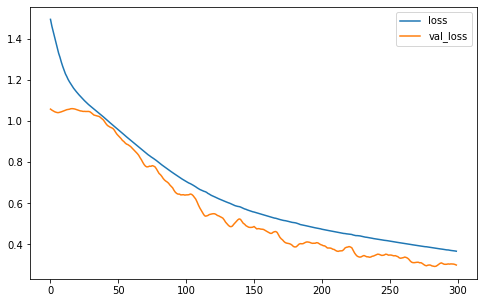

In [6]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).drop(["accuracy", "val_accuracy"], axis=1).plot(figsize=(8,5))
plt.show()

Nous pouvons voir que la perte diminue de manière stable même après 300 epochs. Le jeu de validation semble indiquer que nous n'avons pas *overfit* le dataset d'entraînement. 

Vers la fin des 300 epochs, les gains en termes de réduction de la fonction de perte commencent stagner. 

4) Comparer la précision de la classification obtenue avec la régression logistique de
l'exercice 2.

In [7]:
from sklearn.metrics import accuracy_score
print('results:')
print('accuracy: {:2.5}'.format(accuracy_score(model.predict(X_test).argmax(axis=1), Y_test.argmax(axis=1))))

results:
accuracy: 0.97368


<AxesSubplot:>

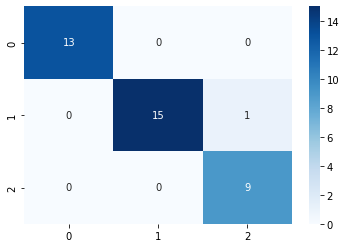

In [8]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(model.predict(X_test).argmax(axis=1), Y_test.argmax(axis=1)), annot=True, cmap="Blues")

If we compare with our previous results with the Logistic Regression Classifier we have pretty much the same results. </br>

By *Occam's Razor*, we should probably use the Logistic Classifier (4 weigths for the Logistic Classifier vs 131 weights for the NN).

We can observe a variation when using the validation set while training, the results are better using the validation at 10%. </br>

We tried to increase the number of epochs and we gain 3% on our accuracy. From 94% to 97%. </br>
